In [19]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="sans-serif",color_codes=True)
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve

In [2]:
df = pd.read_csv(r"C:\Users\Tshepo\Desktop\MLAgortihms\Datasets\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x = df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = df.iloc[::,-1]
x_constant = sm.add_constant(x)
model = sm.Logit(y,x_constant).fit()
model.predict(x_constant)
model.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.2718
Time:                        12:48:47   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

In [6]:
x = df[["Pregnancies","Glucose","BloodPressure","BMI","DiabetesPedigreeFunction"]]
y = df.iloc[::,-1]
x_constant = sm.add_constant(x)
model = sm.OLS(y,x_constant).fit()
model.predict(x_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     64.92
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.76e-56
Time:                        12:49:55   Log-Likelihood:                -384.39
No. Observations:                 768   AIC:                             780.8
Df Residuals:                     762   BIC:                             808.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.7966      0.082     -9.765      0.000      -0.957      -0.636
Pregnancies                  0.0258      0.004      5.898      0.000       0.017       0.034
Glucose                      0.0059      0.000     12.482      0.000       0.005       0.007
BloodPressure               -0.0021      0.001     -2.648      0.008      -0.004      -0.001
BMI                          0.0128      0.002      6.539      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1430      0.044      3.218      0.001       0.056       0.230
==============================================================================
Omnibus:                       39.537   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.027
Skew:                           0.416   Prob(JB):                     1.11e-07
Kurtosis:                       2.445   Cond. No.                         827.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
LSVC.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [12]:
y_predLSVC = LSVC.predict(x_test)
pd.DataFrame({"Predicted": y_predLSVC, "Actual": y_test})

,Predicted,Actual
661,1,1
122,0,0
113,0,0
14,0,1
529,0,0
...,...,...
476,0,1
482,0,0
230,0,1
527,0,0


In [13]:
classification_reportLSVC = pd.DataFrame(metrics.classification_report(y_test,y_predLSVC,output_dict=True)).transpose()
classification_reportLSVC

,precision,recall,f1-score,support
0,0.716216,0.990654,0.831373,107.000000
1,0.833333,0.106383,0.188679,47.000000
accuracy,0.720779,0.720779,0.720779,0.720779
macro avg,0.774775,0.548519,0.510026,154.000000
weighted avg,0.751960,0.720779,0.635226,154.000000


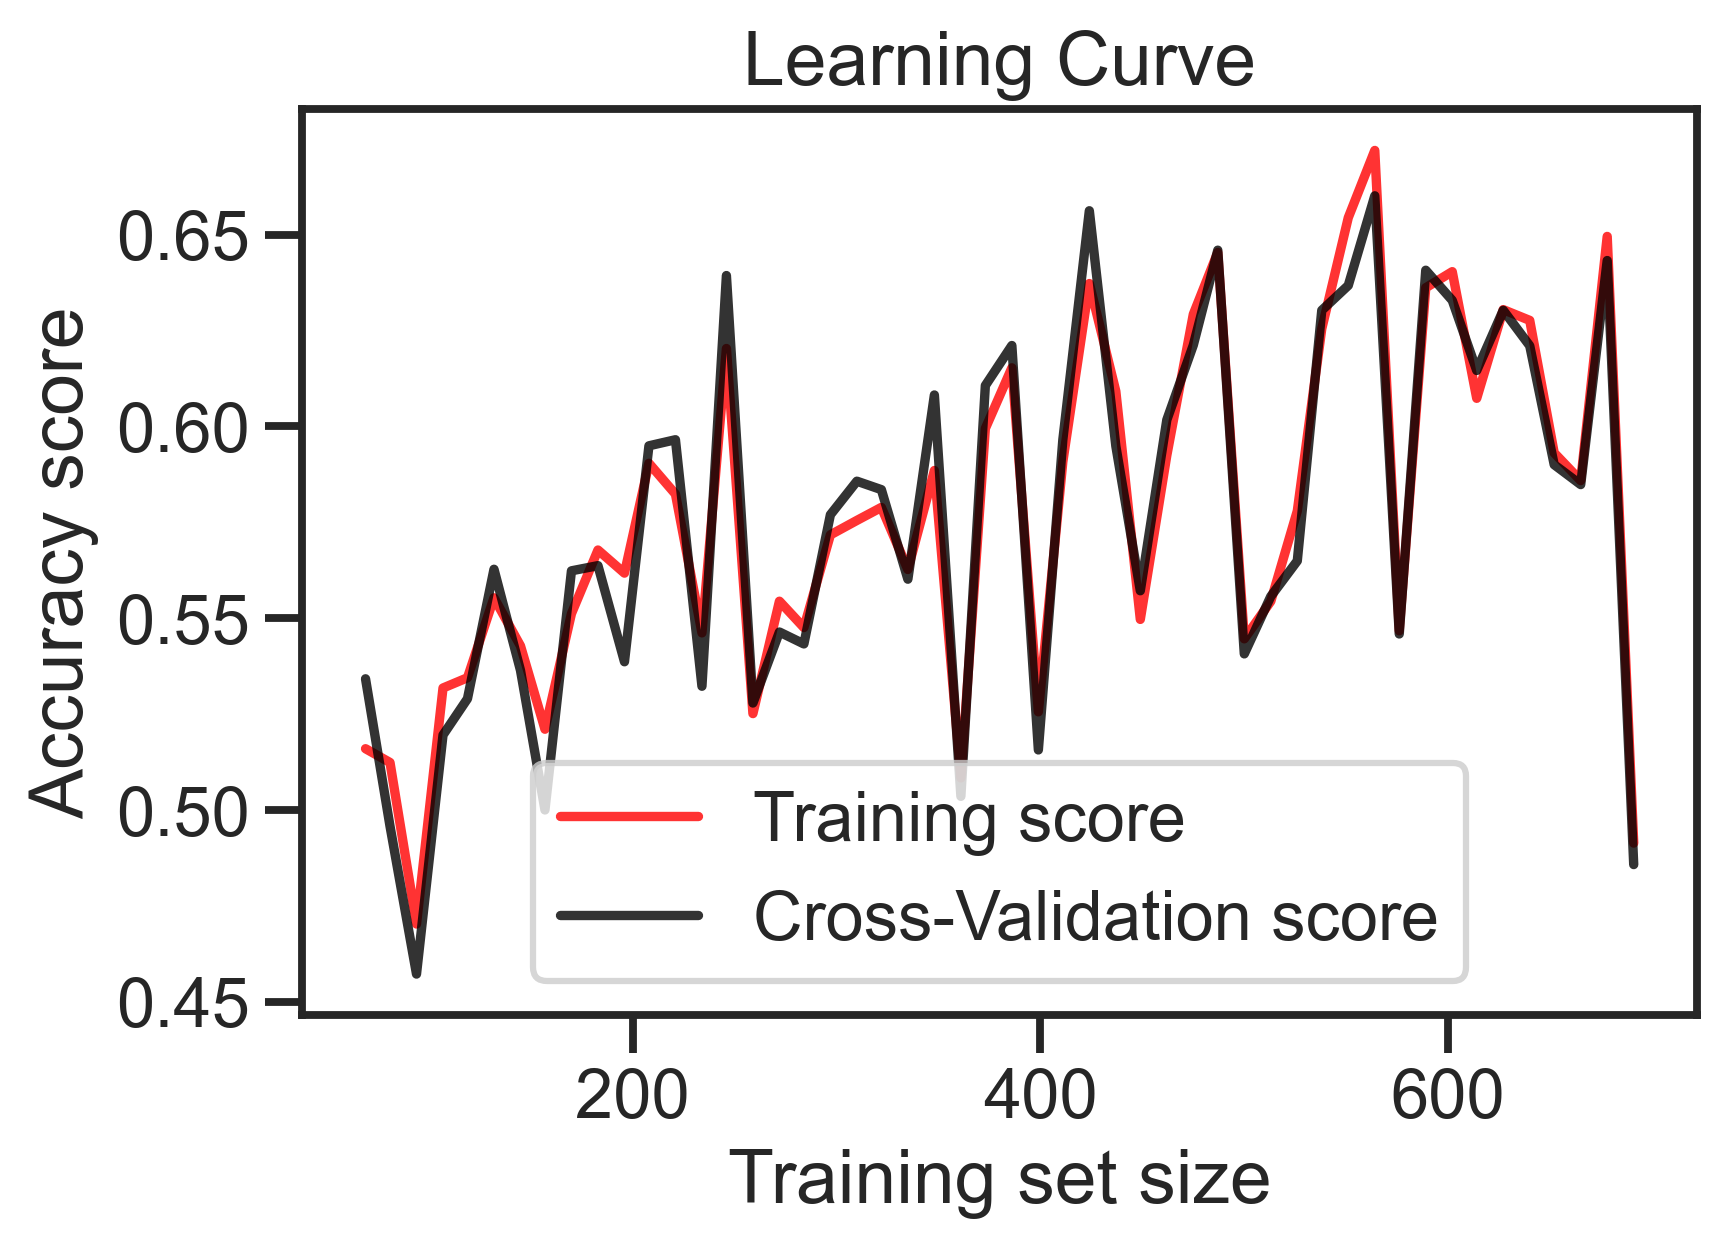

In [21]:
trainsizeLSVC, trainscoreLSVC, testscoreLSVC = learning_curve(LinearSVC(),x,y,cv=10,n_jobs=-1, train_sizes=np.linspace(0.1,1.0,50))
trainscoreLSVC_mean = np.mean(trainscoreLSVC,axis=1)
trainscoreLSVC_std = np.std(trainscoreLSVC,axis=1)
testscoreLSVC_mean = np.mean(testscoreLSVC,axis=1)
testscoreLSVC_std = np.std(testscoreLSVC,axis=1)
plt.plot(trainsizeLSVC,trainscoreLSVC_mean,color="red",alpha=0.8,label="Training score")
plt.plot(trainsizeLSVC,testscoreLSVC_mean,color="black",alpha=0.8,label="Cross-Validation score")
plt.title("Learning Curve")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
y_predKNN = KNN.predict(x_test)
pd.DataFrame({"Predicted": y_predKNN, "Actual": y_test})

,Predicted,Actual
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,0,1
482,0,0
230,0,1
527,0,0


In [24]:
classification_reportKNN = pd.DataFrame(metrics.classification_report(y_test,y_predKNN,output_dict=True)).transpose()
classification_reportKNN

,precision,recall,f1-score,support
0,0.822430,0.822430,0.822430,107.000000
1,0.595745,0.595745,0.595745,47.000000
accuracy,0.753247,0.753247,0.753247,0.753247
macro avg,0.709087,0.709087,0.709087,154.000000
weighted avg,0.753247,0.753247,0.753247,154.000000


In [25]:
classification_reportKNN = pd.DataFrame(metrics.classification_report(y_test,y_predKNN,output_dict=True)).transpose()
classification_reportKNN


,precision,recall,f1-score,support
0,0.822430,0.822430,0.822430,107.000000
1,0.595745,0.595745,0.595745,47.000000
accuracy,0.753247,0.753247,0.753247,0.753247
macro avg,0.709087,0.709087,0.709087,154.000000
weighted avg,0.753247,0.753247,0.753247,154.000000


In [27]:
cmatKNN = pd.DataFrame(metrics.confusion_matrix(y_test,y_predKNN), columns = ("Predicted: No "," Predicted: Yes"), index=[" Actual: No"," Actual: Yes"])
cmatKNN


,Predicted: No,Predicted: Yes
Actual: No,88,19
Actual: Yes,19,28


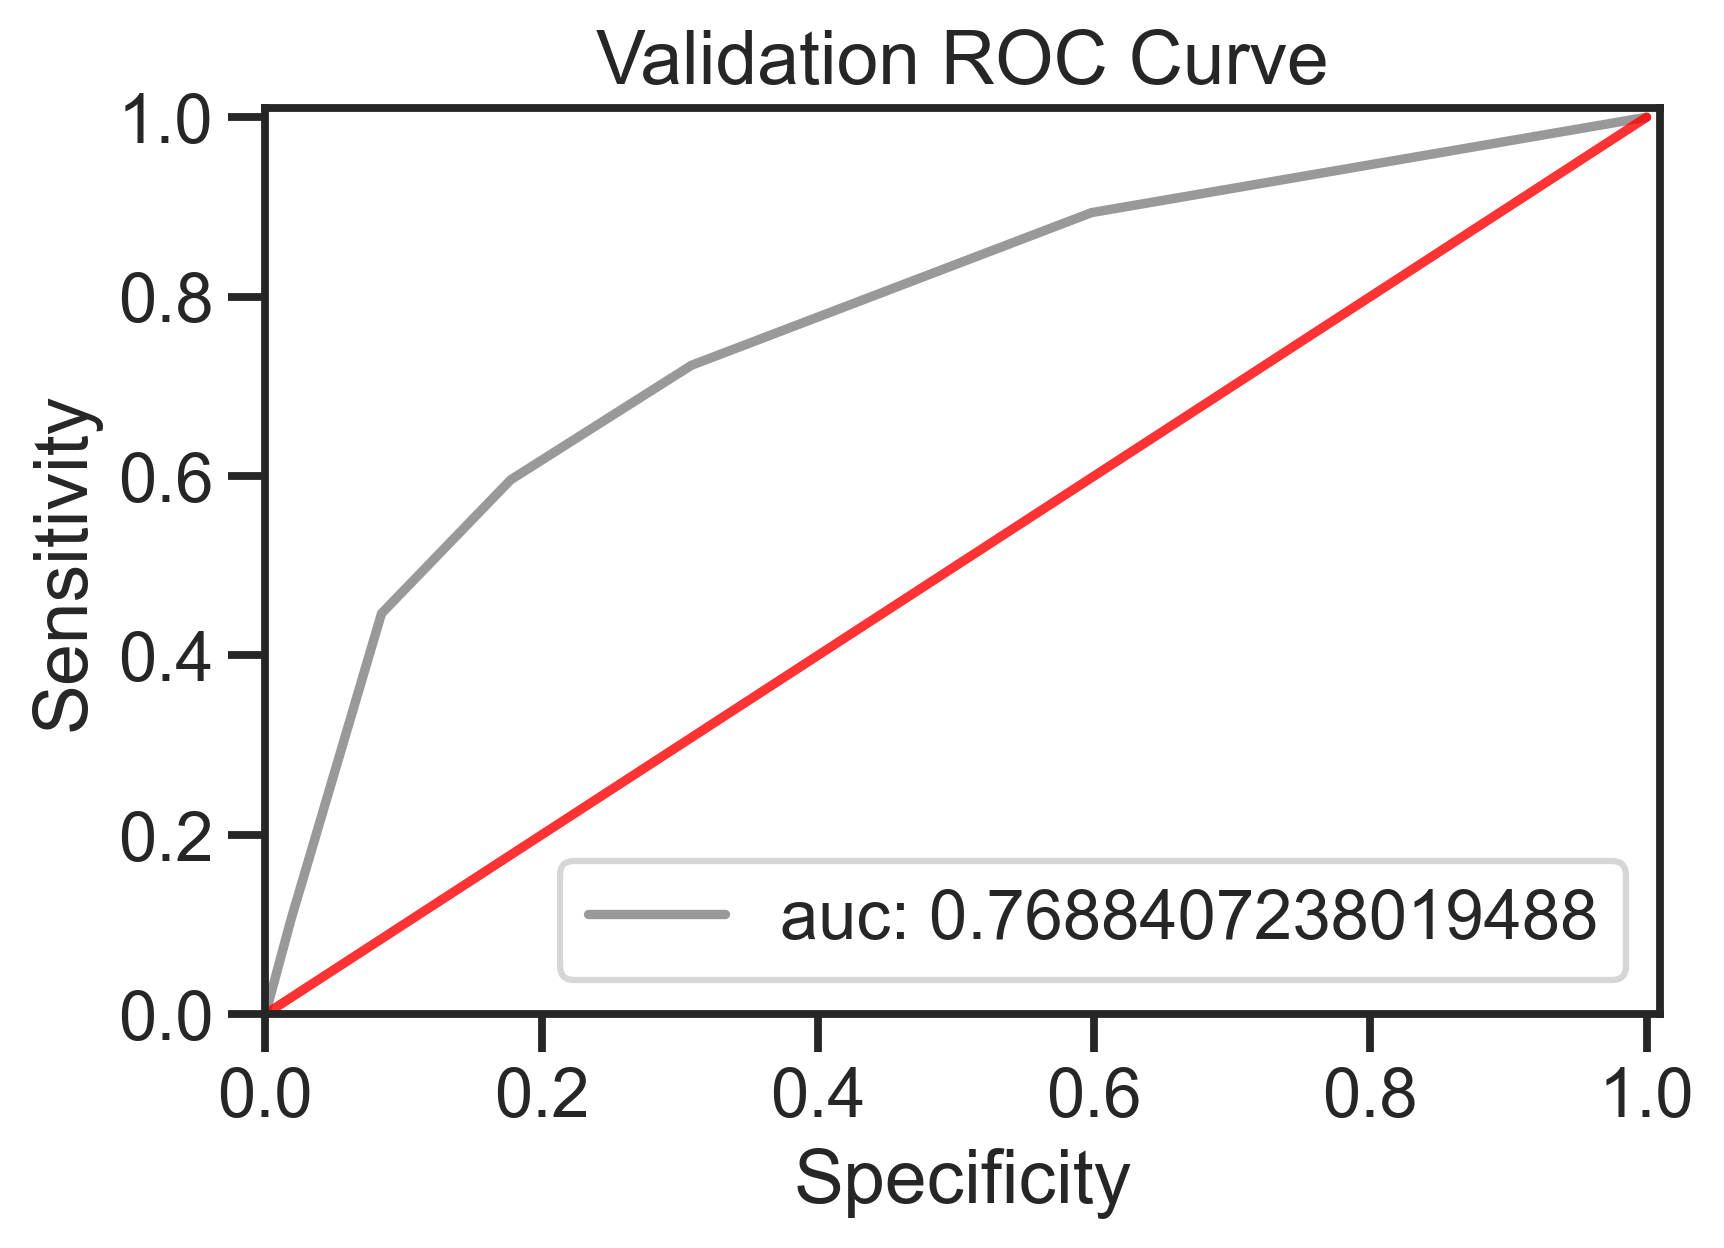

In [28]:
y_predKNN_proba = KNN.predict_proba(x_test)[::,1]
fprKNN, tprKNN, _ = metrics.roc_curve(y_test,y_predKNN_proba)
aucKNN = metrics.roc_auc_score(y_test,y_predKNN_proba)
plt.plot(fprKNN, tprKNN,color="gray",label="auc: "+str(aucKNN),alpha=0.8)
plt.plot([0,1],[0,1],color="red",alpha=0.8)
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()

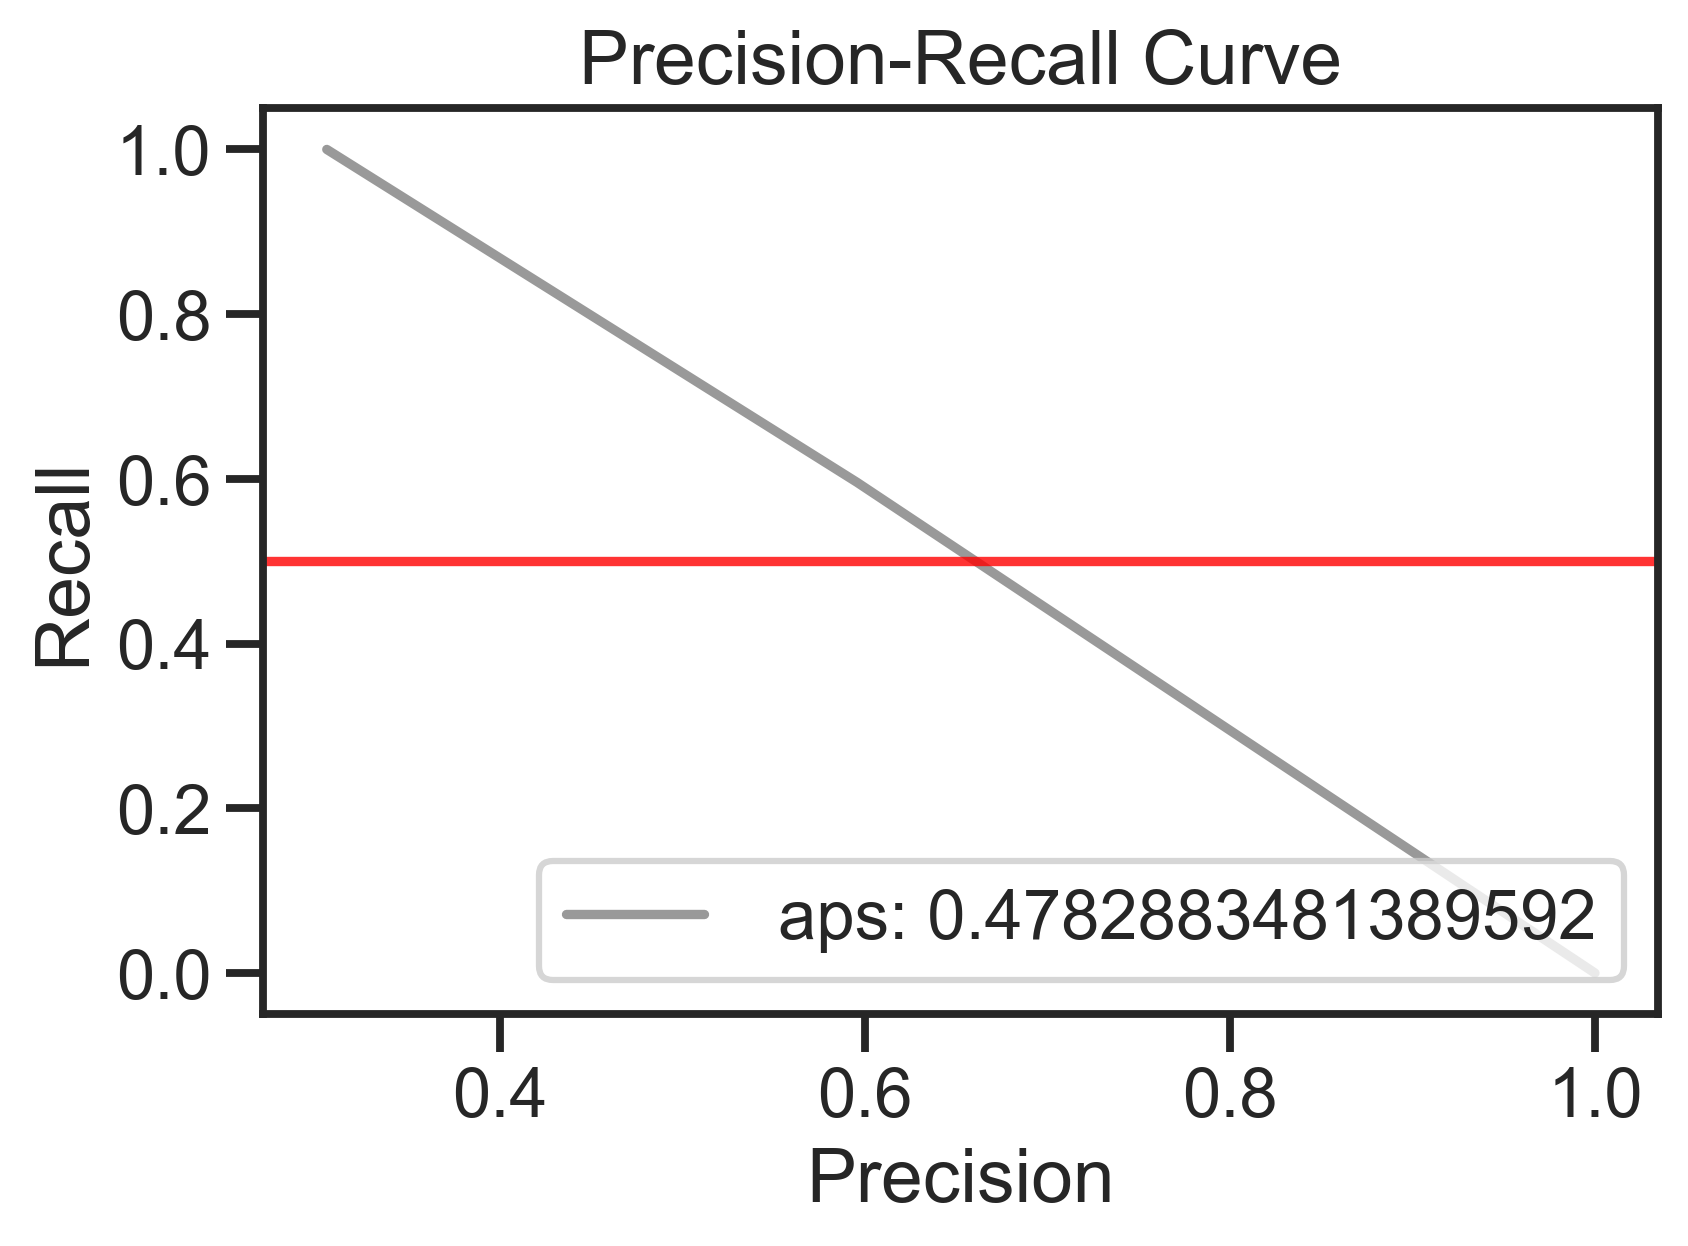

In [30]:
precisionKNN, recallKNN, thresholdKNN = metrics.precision_recall_curve(y_test,y_predKNN)
apsKNN = metrics.average_precision_score(y_test,y_predKNN)
plt.plot(precisionKNN, recallKNN,label=" aps: " + str(apsKNN), color="gray", alpha=0.8)
plt.axhline(y=0.5,color="red",alpha=0.8)
plt.title("Precision-Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.show()

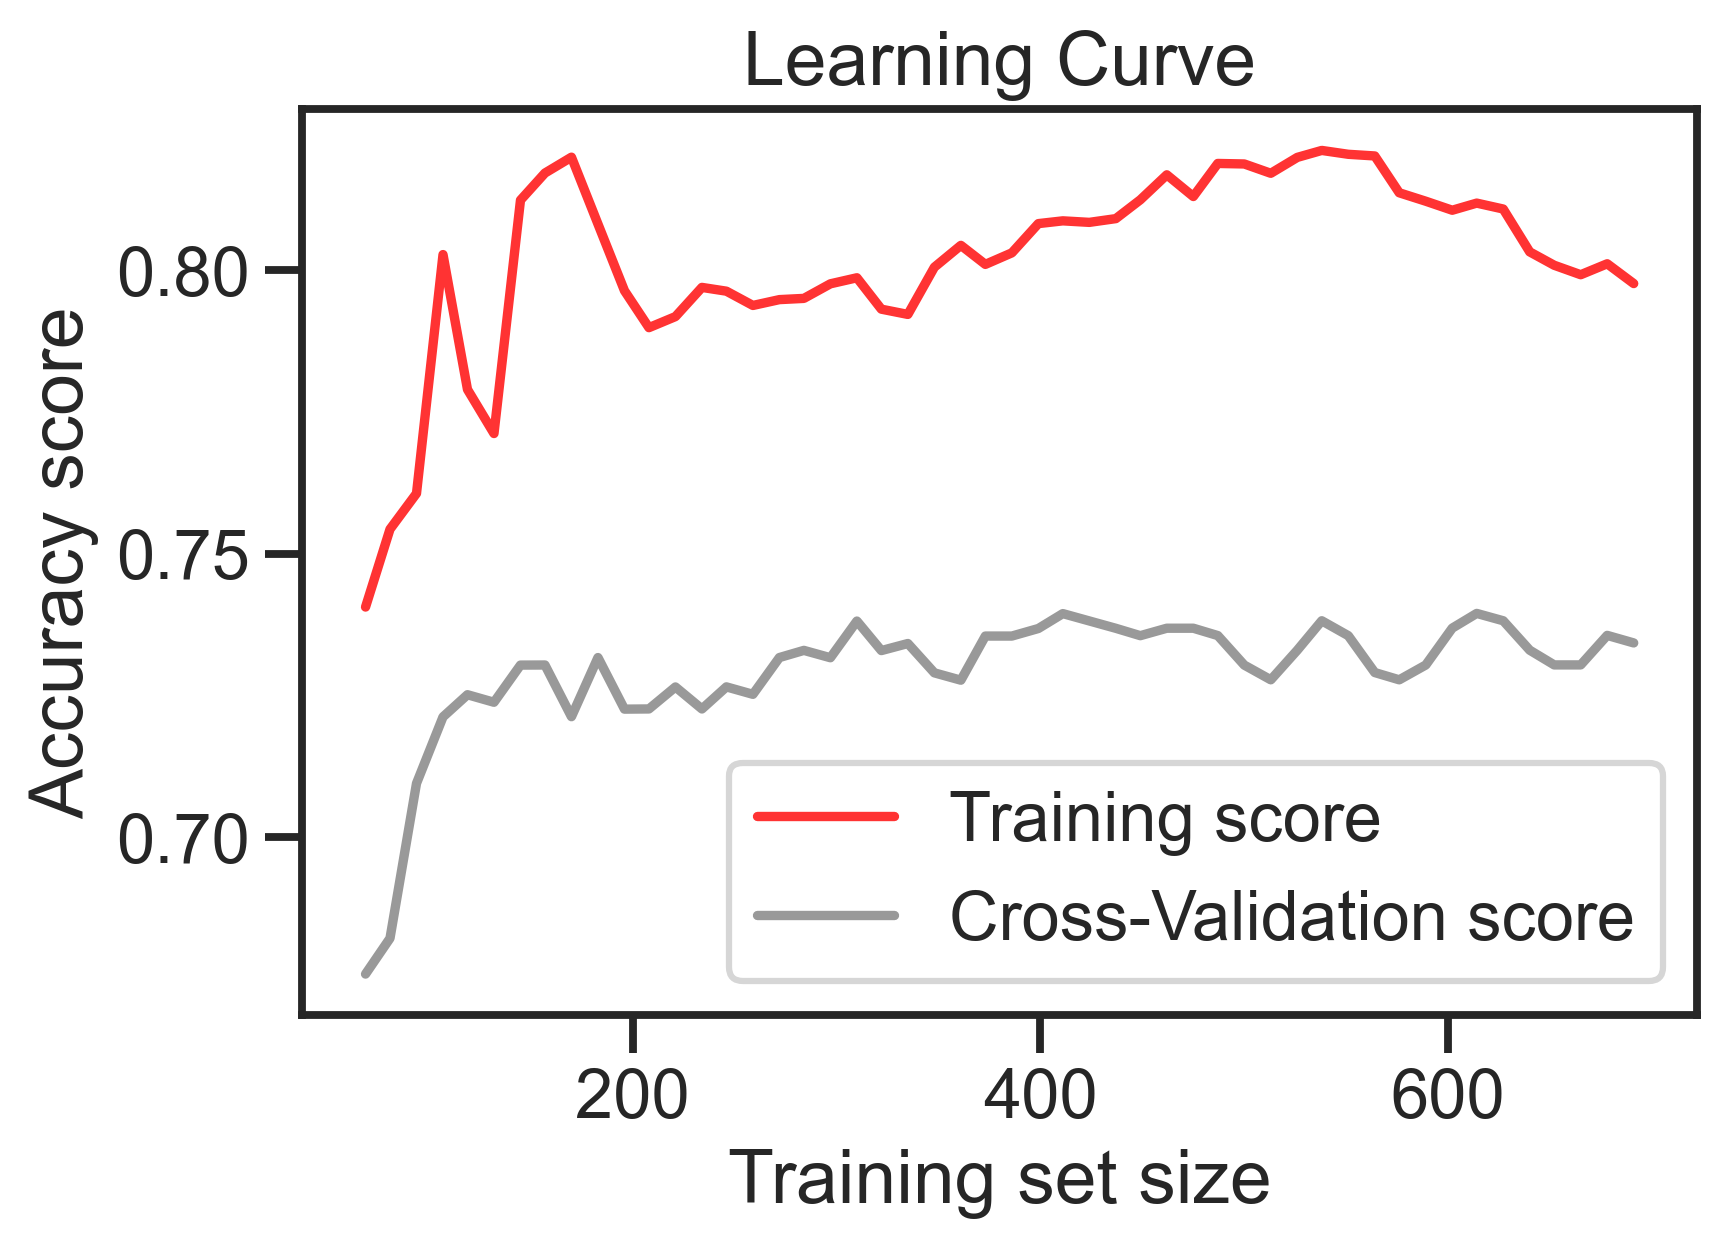

In [31]:
trainsizeKNN, trainscoreKNN, testscoreKNN = learning_curve(KNeighborsClassifier(),x,y,cv=10,n_jobs=-1, scoring="accuracy",train_sizes=np.linspace(0.1,1.0,50))
trainscoreKNN_mean = np.mean(trainscoreKNN,axis=1)
trainscoreKNN_std = np.std(trainscoreKNN,axis=1)
testscoreKNN_mean = np.mean(testscoreKNN,axis=1)
testscoreKNN_std = np.std(testscoreKNN,axis=1)
plt.plot(trainsizeKNN,trainscoreKNN_mean,color="red",alpha=0.8,label="Training score")	
plt.plot(trainsizeKNN,testscoreKNN_mean,color="gray",alpha=0.8,label="Cross-Validation score")
plt.title("Learning Curve")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.legend(loc=4)
plt.show()

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [34]:
y_predLDA = lda.predict(x_test)
pd.DataFrame({"Actual":y_test, "Predicted":y_predLDA})


,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,1
527,0,0


In [35]:
classificationLDA = pd.DataFrame(metrics.classification_report(y_test, y_predLDA, output_dict=True)).transpose()
classificationLDA

,precision,recall,f1-score,support
0,0.843478,0.906542,0.873874,107.000000
1,0.743590,0.617021,0.674419,47.000000
accuracy,0.818182,0.818182,0.818182,0.818182
macro avg,0.793534,0.761782,0.774146,154.000000
weighted avg,0.812993,0.818182,0.813001,154.000000


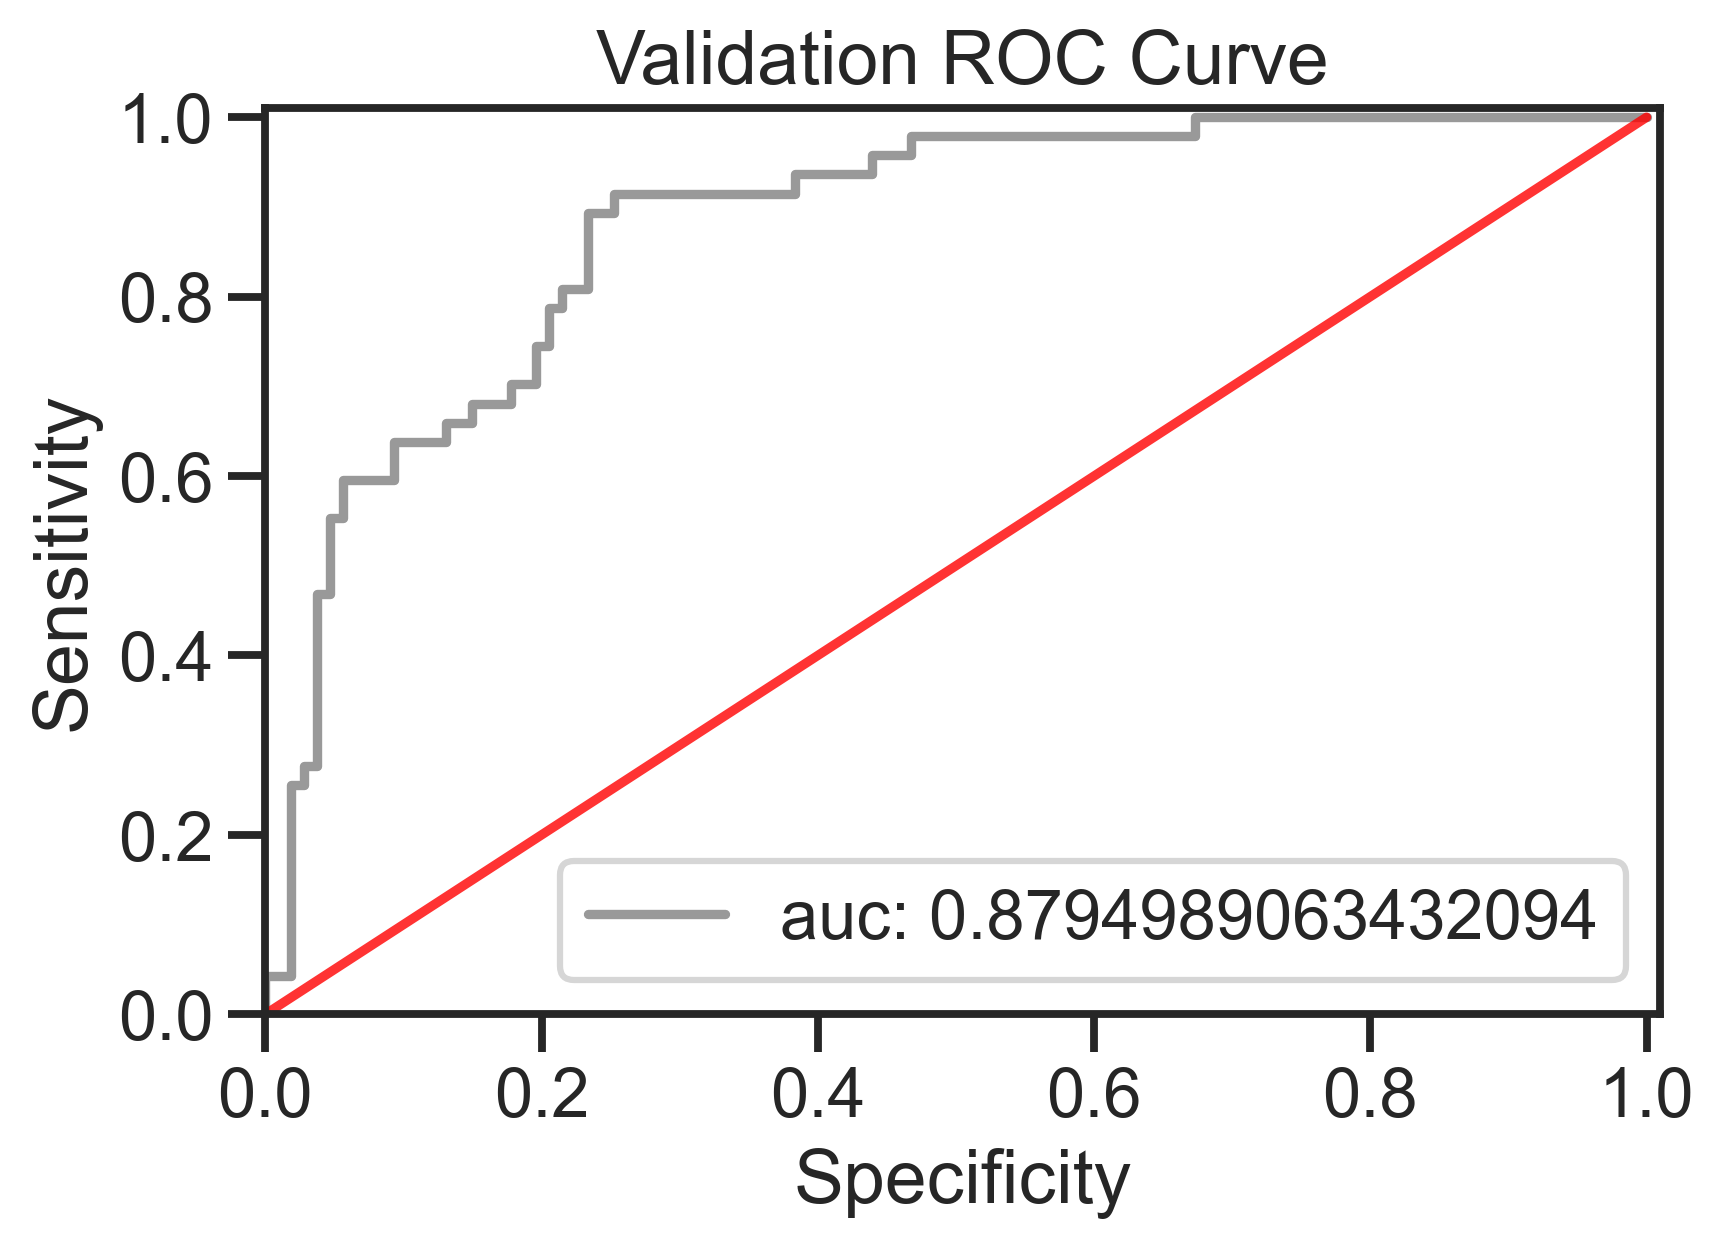

In [36]:
y_predlda_probaLDA = lda.predict_proba(x_test)[::,1]
fprLDA, tprLDA, _ = metrics.roc_curve(y_test,y_predlda_probaLDA)
aucLDA = metrics.roc_auc_score(y_test,y_predlda_probaLDA)
plt.plot(fprLDA, tprLDA,label="auc: " + str(aucLDA),color="gray",alpha=0.8)
plt.plot([0,1], [0,1],color="red",alpha=0.8)
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()

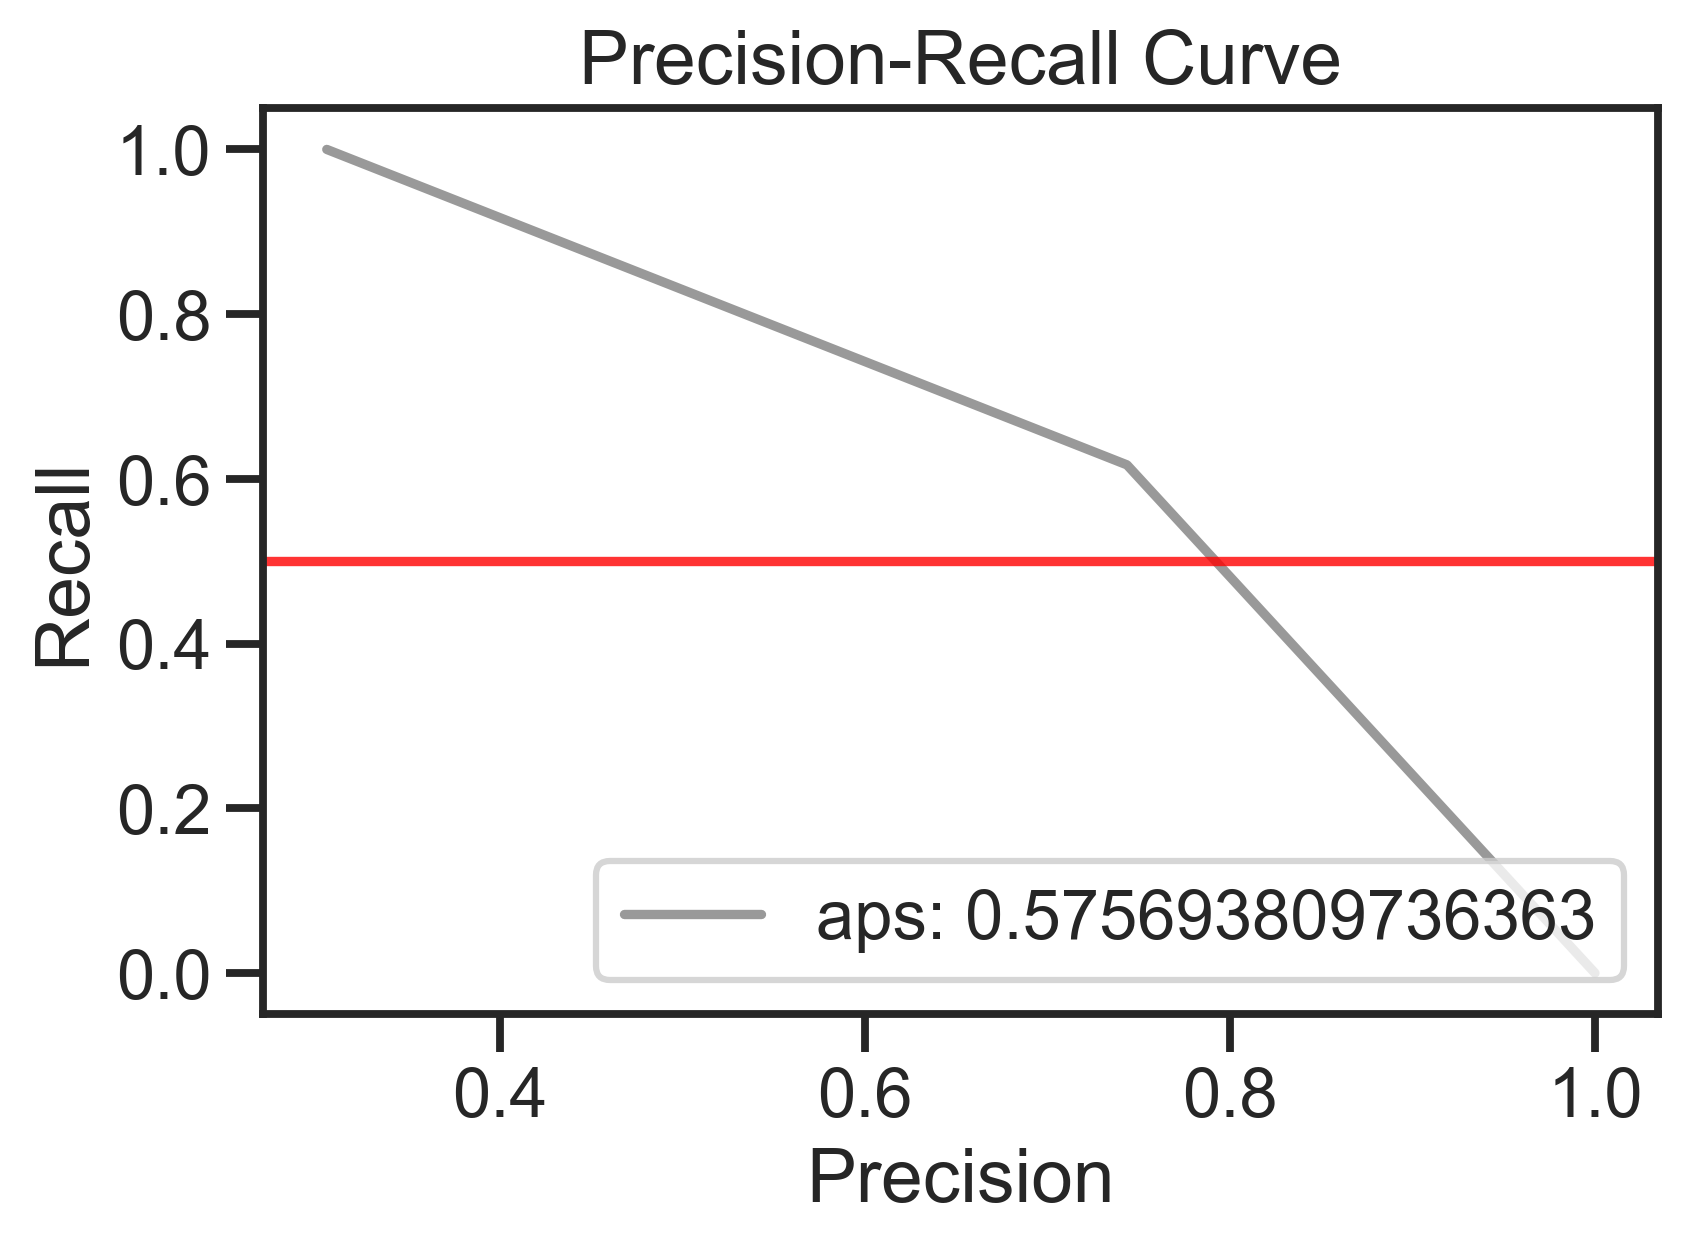

In [37]:
precisionLDA, recallLDA, thresholdLDA = metrics.precision_recall_curve(y_test,y_predLDA)
apsLDA = metrics.average_precision_score(y_test,y_predLDA)
plt.plot(precisionLDA, recallLDA,label="aps: " +str(apsLDA),color="gray",alpha=0.8)
plt.axhline(y=0.5,color="red",alpha=0.8)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.title("Precision-Recall Curve")
plt.show()

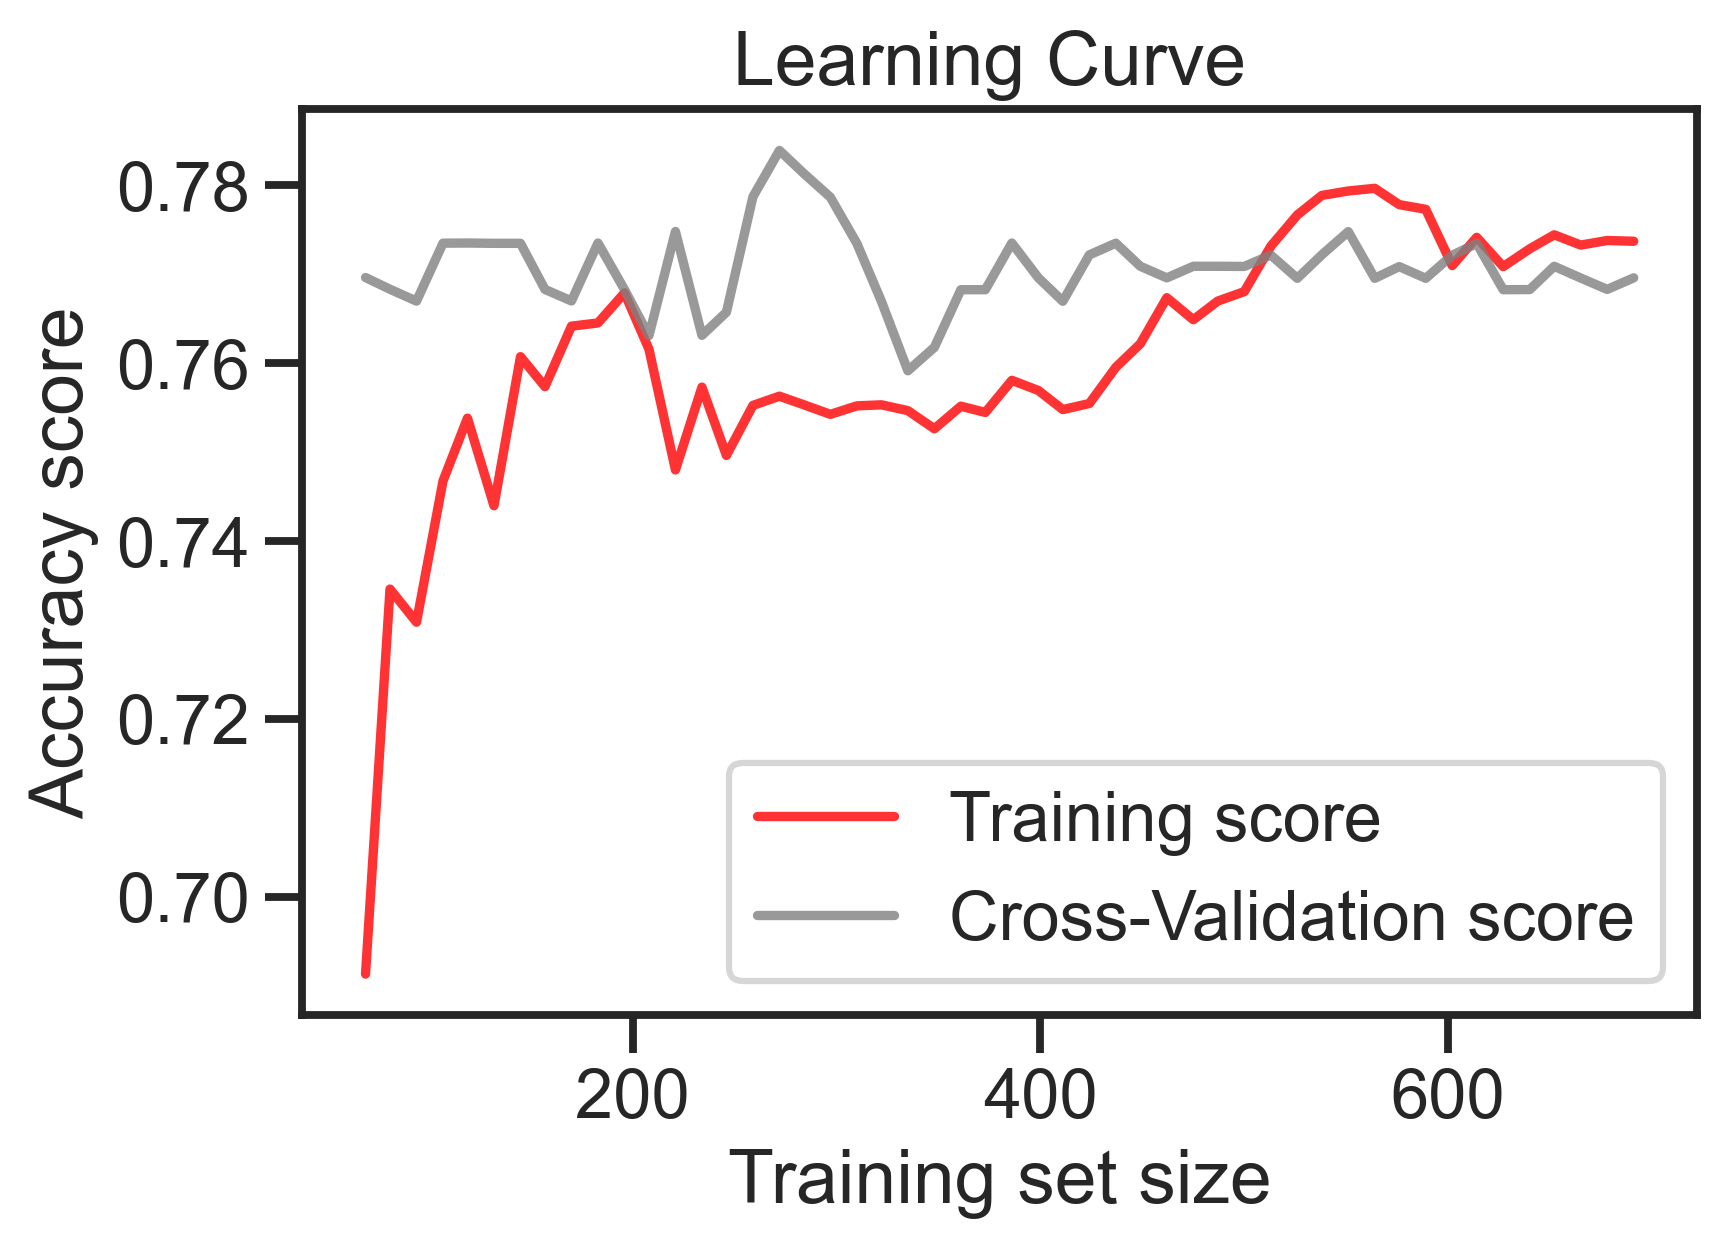

In [38]:
trainsizelda, trainscorelda, testscorelda = learning_curve(LinearDiscriminantAnalysis(),x,y,cv=10,n_jobs=-1, train_sizes=np.linspace(0.1,1.0,50))
trainscorelda_mean = np.mean(trainscorelda,axis=1)
trainscorelda_std = np.std(trainscorelda,axis=1)
testscorelda_mean = np.mean(testscorelda,axis=1)
testscorelda_std = np.std(testscorelda,axis=1)
plt.plot(trainsizelda,trainscorelda_mean,color="red",alpha=0.8,label="Training score")
plt.plot(trainsizelda,testscorelda_mean,color="gray",alpha=0.8,label="Cross-Validation score")
plt.title("Learning Curve ")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.legend(loc=4)
plt.show()

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
y_predGNB = gnb.predict(x_test)
pd.DataFrame({"Actual":y_test, "Predicted":y_predGNB})

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,1
527,0,0


In [41]:
classificationGNB = pd.DataFrame(metrics.classification_report(y_test, y_predGNB, output_dict=True)).transpose()
classificationGNB

,precision,recall,f1-score,support
0,0.855856,0.887850,0.871560,107.000000
1,0.720930,0.659574,0.688889,47.000000
accuracy,0.818182,0.818182,0.818182,0.818182
macro avg,0.788393,0.773712,0.780224,154.000000
weighted avg,0.814677,0.818182,0.815809,154.000000


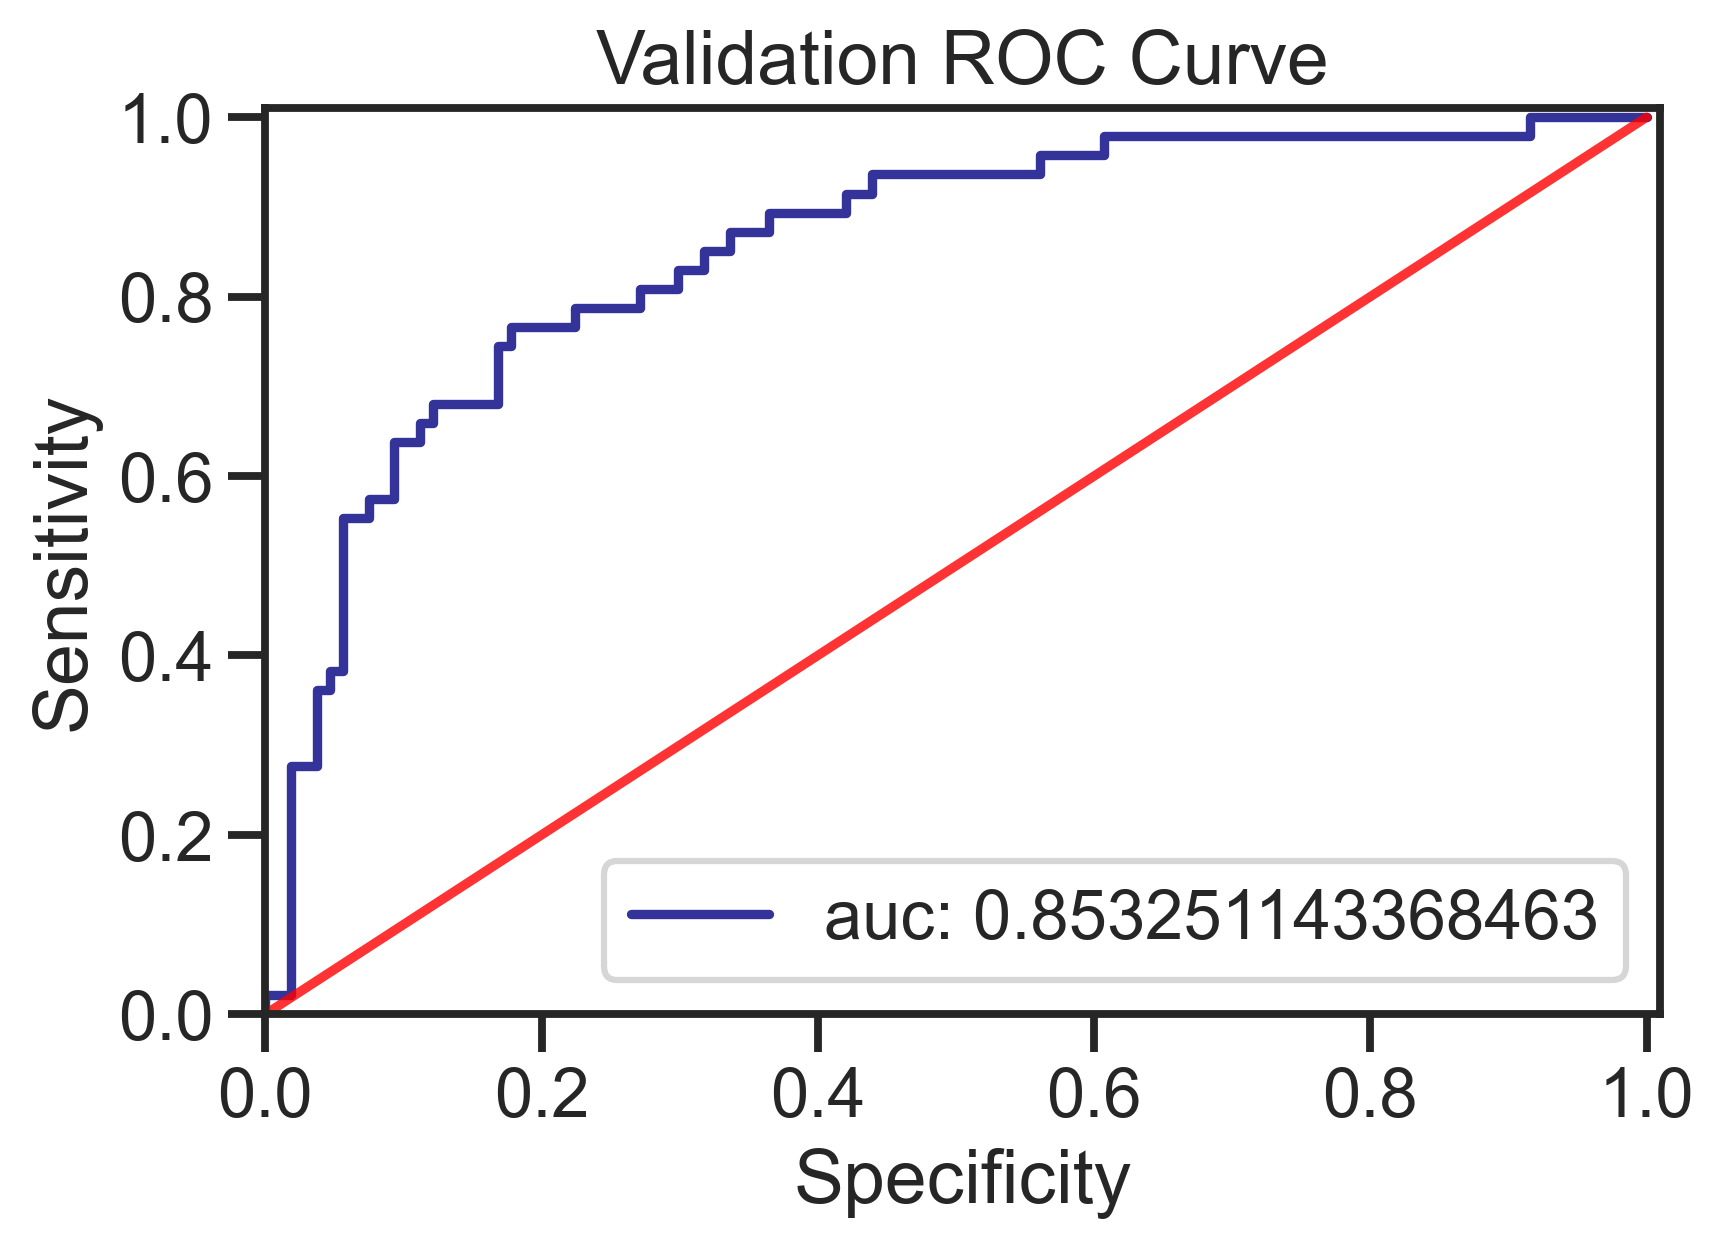

In [45]:
y_predgnb_probaGNB = gnb.predict_proba(x_test)[::,1]
fprGNB, tprGNB, _ = metrics.roc_curve(y_test,y_predgnb_probaGNB)
aucGNB = metrics.roc_auc_score(y_test,y_predgnb_probaGNB)
plt.plot(fprGNB, tprGNB,label="auc: " + str(aucGNB),color="navy",alpha=0.8)
plt.plot([0,1], [0,1],color="red",alpha=0.8)
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()

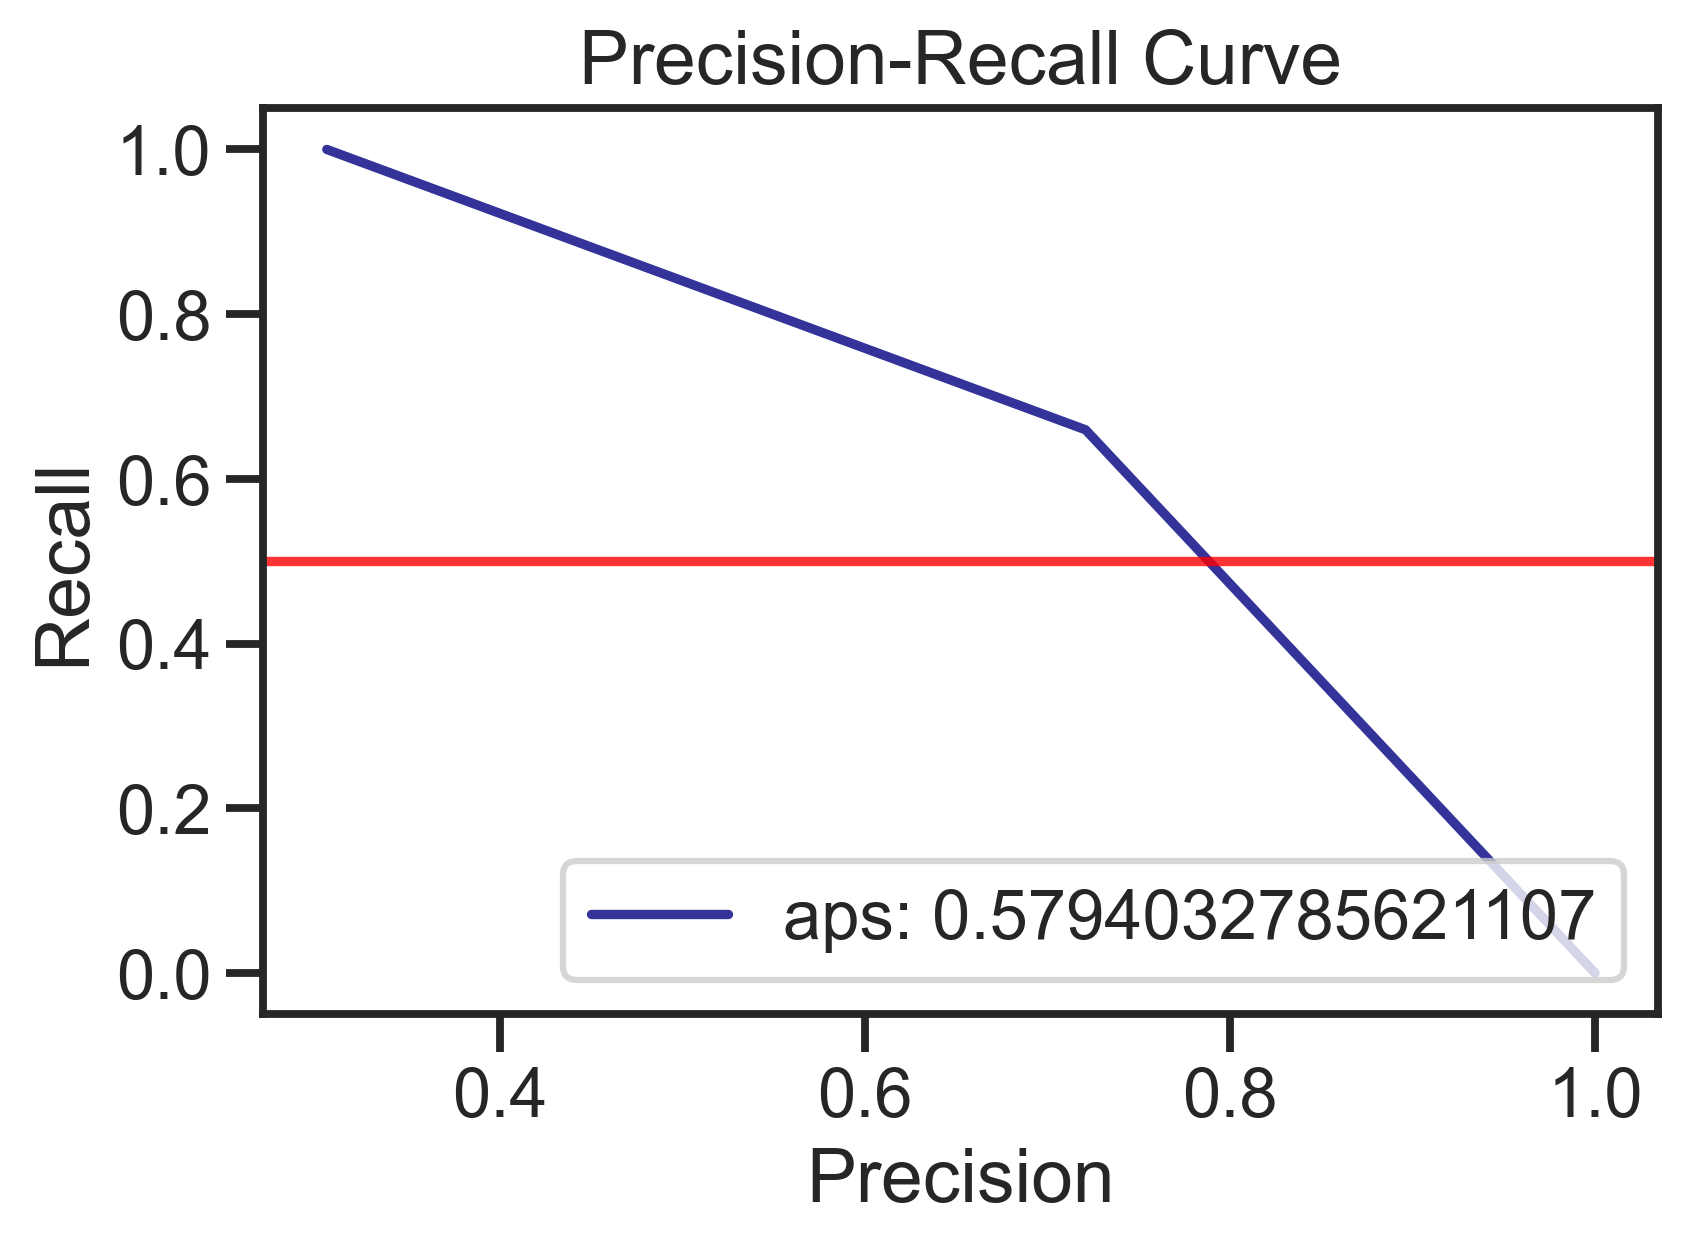

In [46]:
precisionGNB, recallGNB, thresholdGNB = metrics.precision_recall_curve(y_test,y_predGNB)
apsGNB = metrics.average_precision_score(y_test,y_predGNB)
plt.plot(precisionGNB, recallGNB,label="aps: " +str(apsGNB),color="navy",alpha=0.8)
plt.axhline(y=0.5,color="red",alpha=0.8)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.title("Precision-Recall Curve")
plt.show()

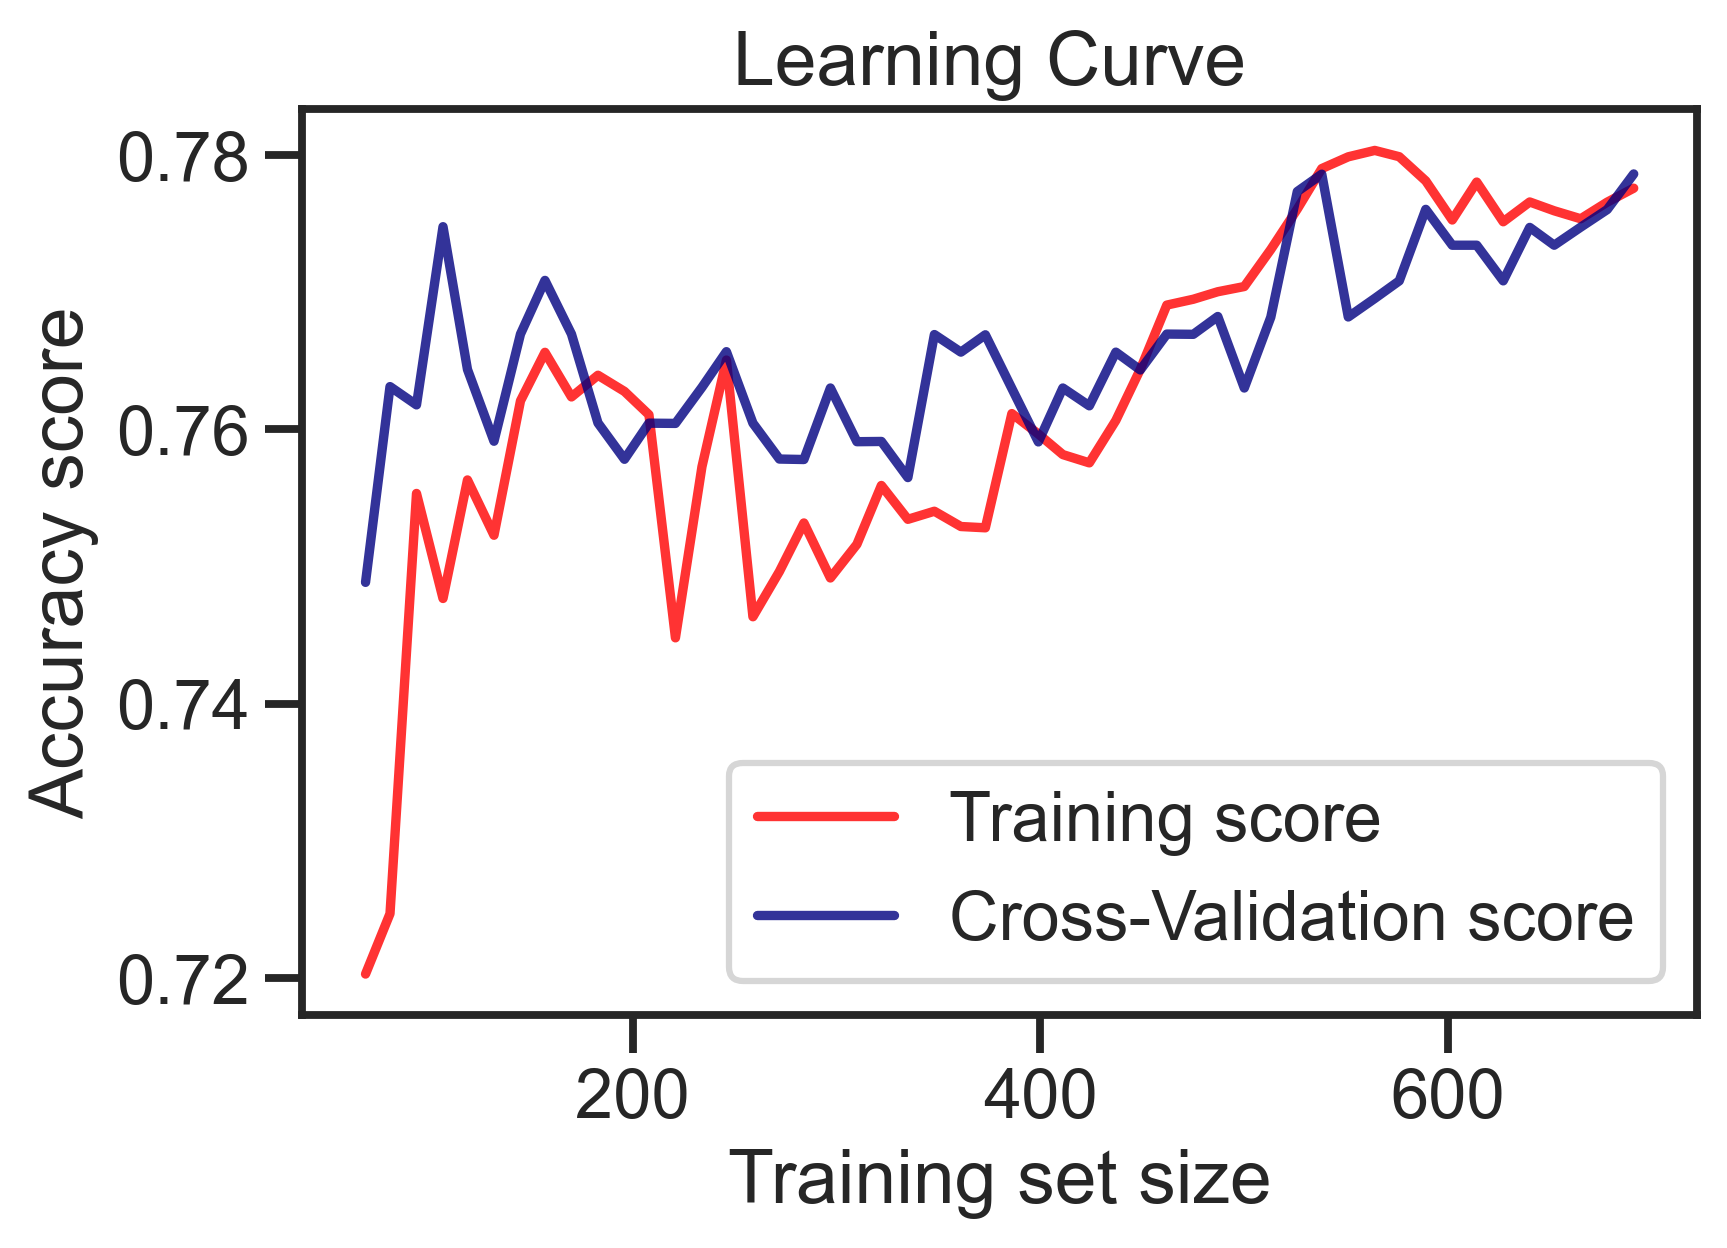

In [47]:
trainsizegnb, trainscoregnb, testscoregnb = learning_curve(GaussianNB(),x,y,cv=10,n_jobs=-1, train_sizes=np.linspace(0.1,1.0,50))
trainscoregnb_mean = np.mean(trainscoregnb,axis=1)
trainscoregnb_std = np.std(trainscoregnb,axis=1)
testscoregnb_mean = np.mean(testscoregnb,axis=1)
testscoregnb_std = np.std(testscoregnb,axis=1)
plt.plot(trainsizegnb,trainscoregnb_mean,color="red",alpha=0.8,label="Training score")
plt.plot(trainsizegnb,testscoregnb_mean,color="navy",alpha=0.8,label="Cross-Validation score")
plt.title("Learning Curve ")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.legend(loc=4)
plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
y_predDT = DT.predict(x_test)
pd.DataFrame({"Actual":y_test, "Predicted":y_predDT})

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,1
527,0,0


In [50]:
classificationDT = pd.DataFrame(metrics.classification_report(y_test, y_predDT, output_dict=True)).transpose()
classificationDT

,precision,recall,f1-score,support
0,0.803922,0.766355,0.784689,107.000000
1,0.519231,0.574468,0.545455,47.000000
accuracy,0.707792,0.707792,0.707792,0.707792
macro avg,0.661576,0.670412,0.665072,154.000000
weighted avg,0.717035,0.707792,0.711676,154.000000


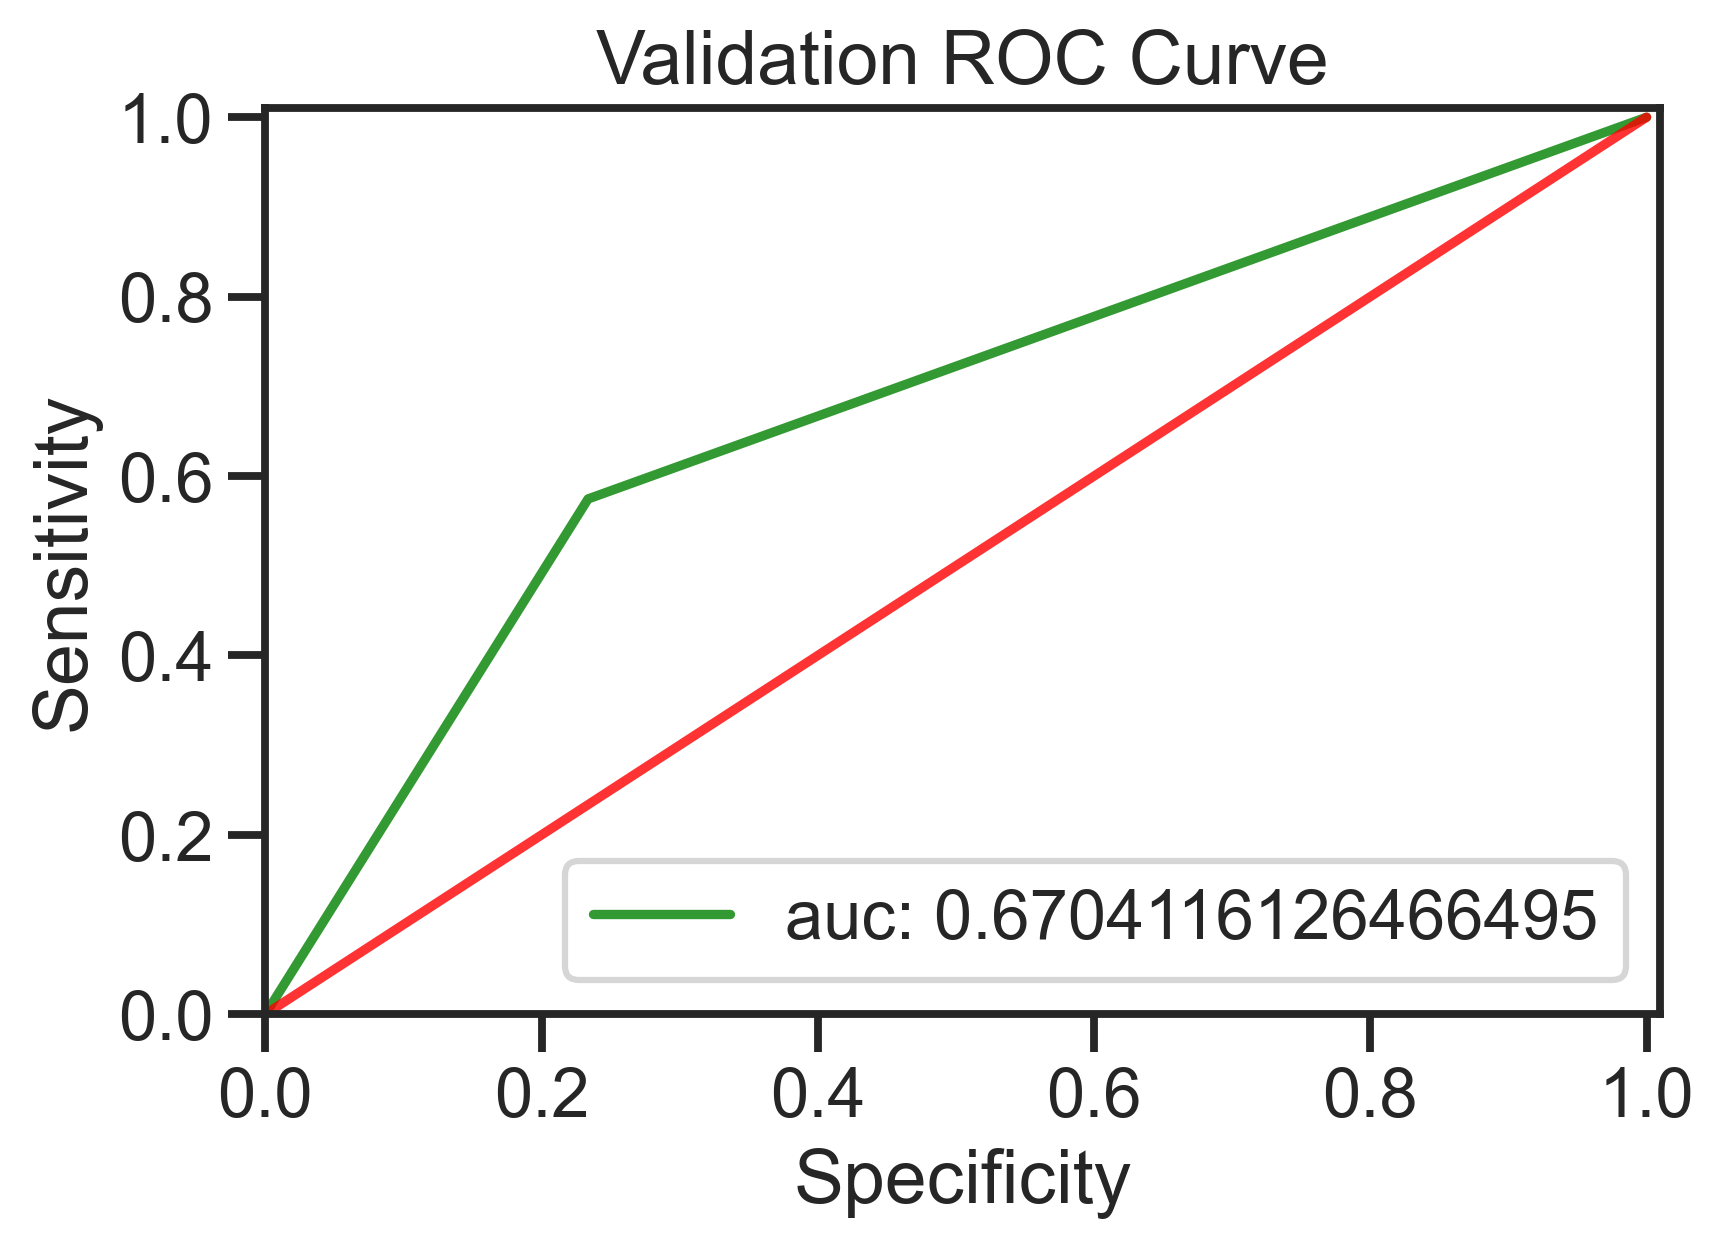

In [51]:
y_preddt_probaDT = DT.predict_proba(x_test)[::,1]
fprDT, tprDT, _ = metrics.roc_curve(y_test,y_preddt_probaDT)
aucDT = metrics.roc_auc_score(y_test,y_preddt_probaDT)
plt.plot(fprDT, tprDT,label="auc: " + str(aucDT),color="green",alpha=0.8)
plt.plot([0,1], [0,1],color="red",alpha=0.8)
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.title("Validation ROC Curve")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()


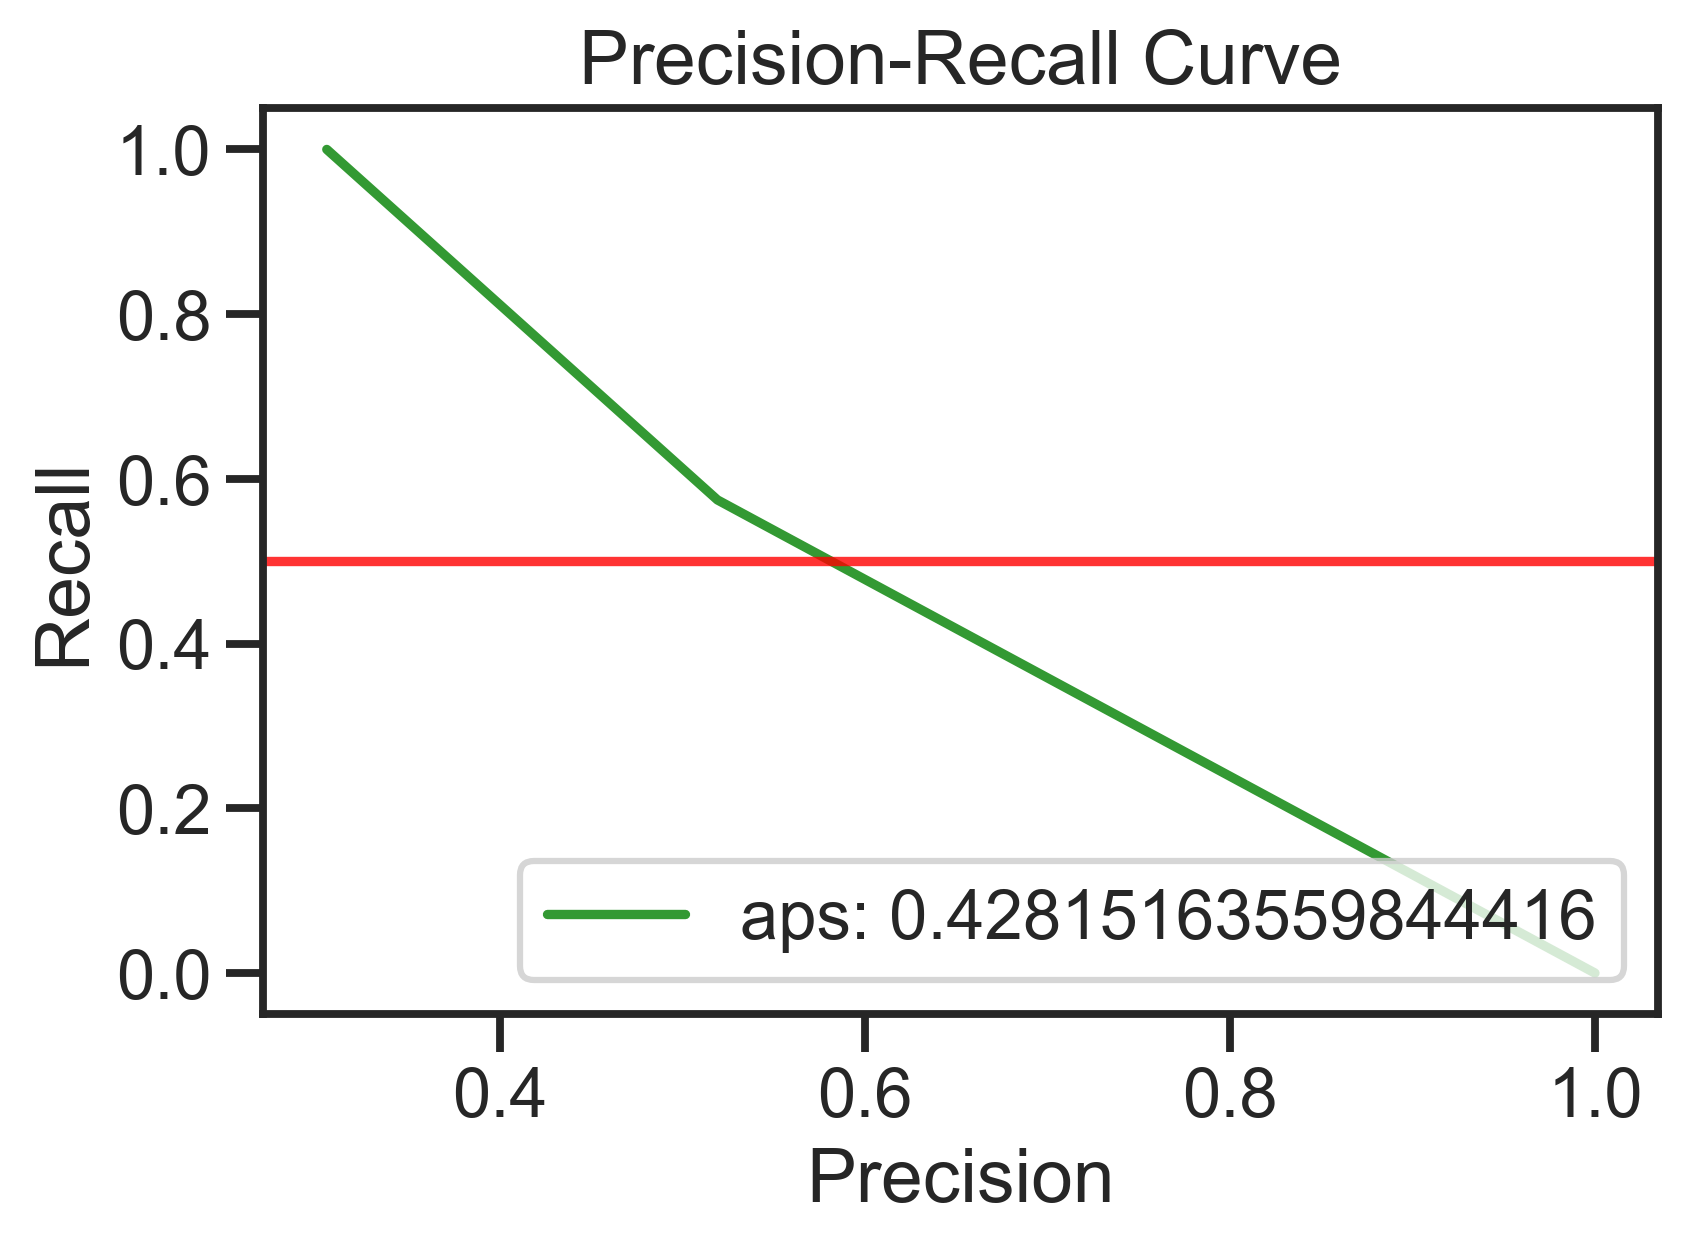

In [53]:
precisionDT, recallDT, thresholdDT = metrics.precision_recall_curve(y_test,y_predDT)
apsDT = metrics.average_precision_score(y_test,y_predDT)
plt.plot(precisionDT, recallDT,label="aps: " +str(apsDT),color="green",alpha=0.8)
plt.axhline(y=0.5,color="red",alpha=0.8)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.title("Precision-Recall Curve")
plt.show()

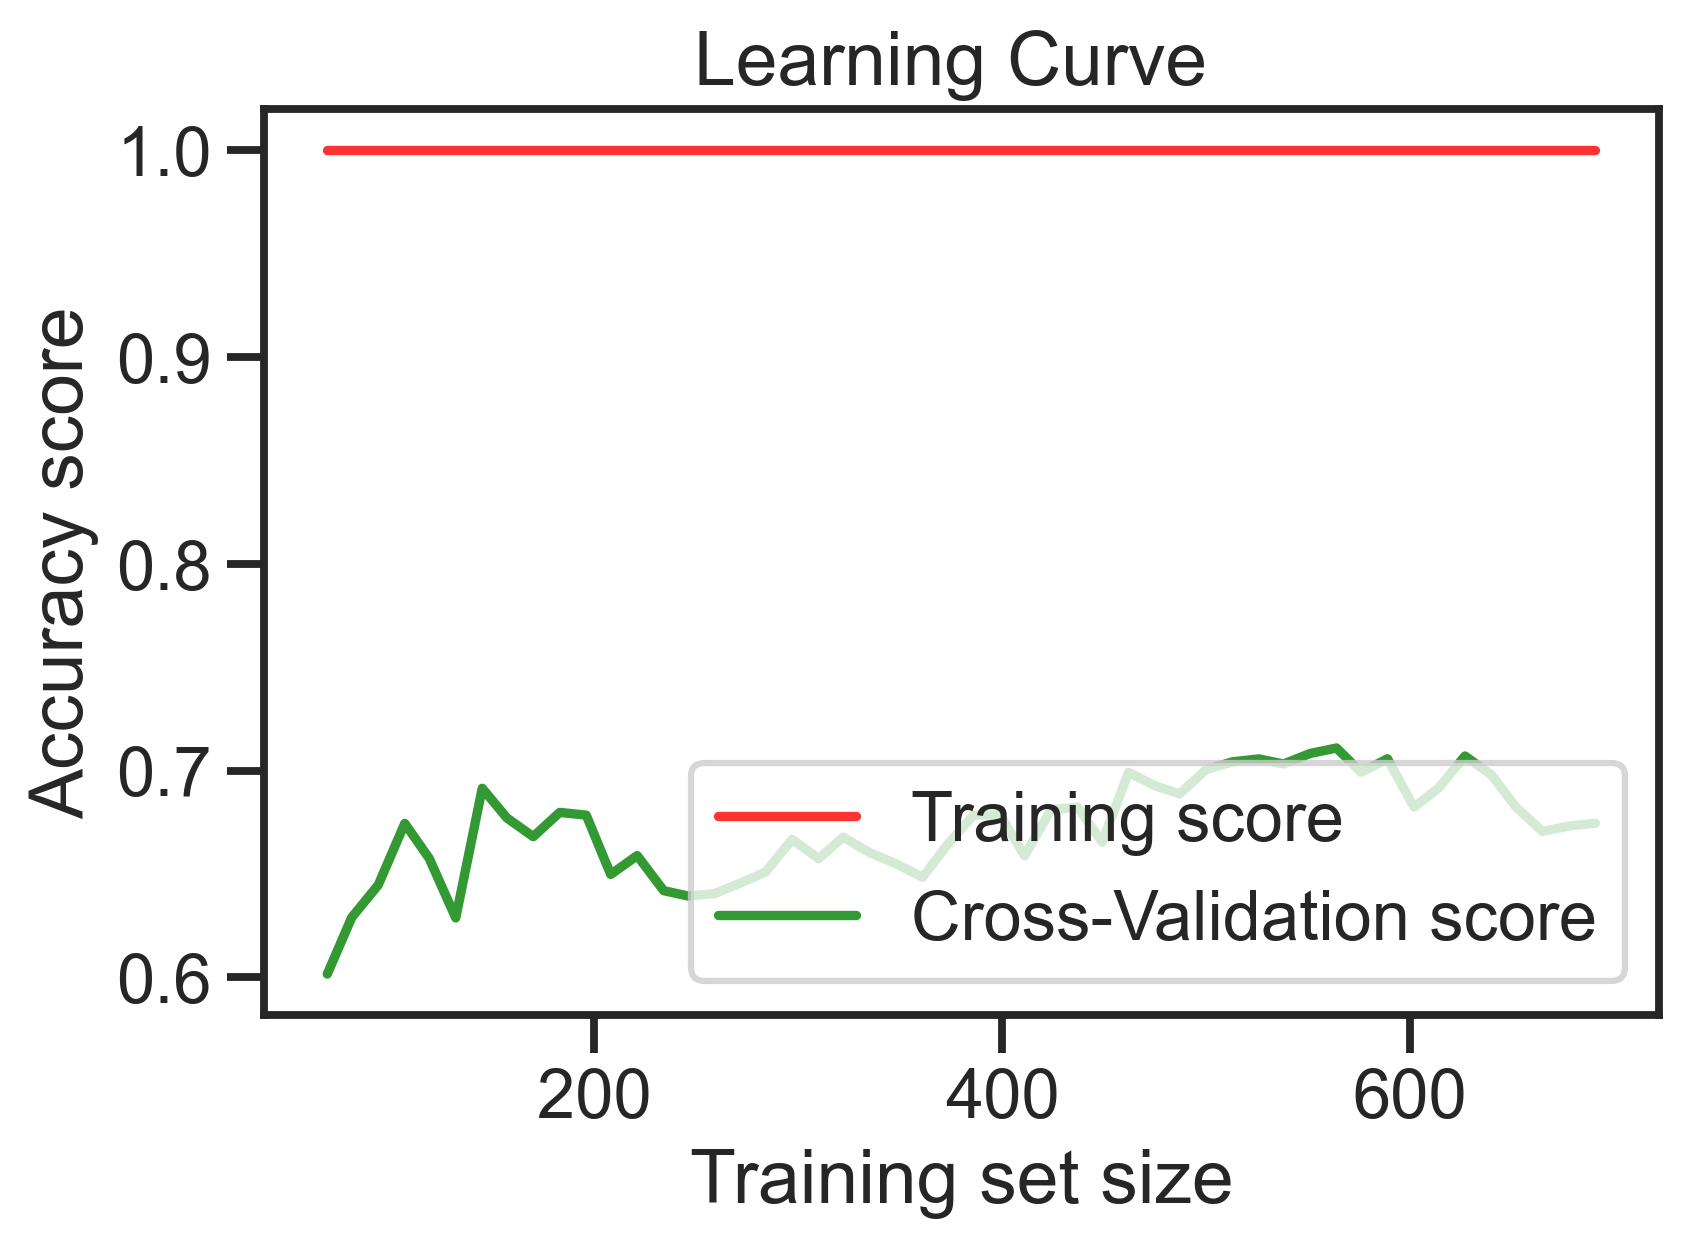

In [54]:
trainsizedt, trainscoredt, testscoredt = learning_curve(DecisionTreeClassifier(),x,y,cv=10,n_jobs=-1, train_sizes=np.linspace(0.1,1.0,50))
trainscoredt_mean = np.mean(trainscoredt,axis=1)
trainscoredt_std = np.std(trainscoredt,axis=1)
testscoredt_mean = np.mean(testscoredt,axis=1)
testscoredt_std = np.std(testscoredt,axis=1)
plt.plot(trainsizedt,trainscoredt_mean,color="red",alpha=0.8,label="Training score")
plt.plot(trainsizedt,testscoredt_mean,color="green",alpha=0.8,label="Cross-Validation score")
plt.title("Learning Curve ")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.legend(loc=4)
plt.show()
